In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc
import single_session_plots as ssp
import SimilarityMatrixAnalysis as sm
import BayesianDecoding as bd
import sklearn as sk

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# load session
mouse = '4139219.3'
df = pp.load_session_db()


#df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_sess = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_sess


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
632,4139219.3,08_10_2018,3,TwoTower_noTimeout,63,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
635,4139219.3,08_10_2018,5,TwoTower_noTimeout,55,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
667,4139219.3,10_10_2018,2,TwoTower_noTimeout,100,1,CA1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139219.3\10_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...
708,4139219.3,12_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139219.3\12_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...
754,4139219.3,15_10_2018,2,TwoTower_Timeout,46,1,CA1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139219.3\15_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...
801,4139219.3,17_10_2018,2,TwoTower_Timeout,38,1,CA1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139219.3\17_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...
841,4139219.3,19_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.3\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...
856,4139219.3,20_10_2018,1,TwoTower_Timeout,51,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
857,4139219.3,20_10_2018,2,TwoTower_Timeout,53,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
874,4139219.3,22_10_2018,1,TwoTower_Timeout,49,1,CA1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139219.3\22_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...


In [13]:
VRDat,C,Cd, S, A = pp.load_scan_sess(df_sess.iloc[-1])
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)

G:\My Drive\2P_Data\TwoTower\4139219.3\26_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_001.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139219.3\26_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_001.mat
#subsystem#not made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [14]:
print(trial_info.keys())

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


In [15]:
correctMask = trial_info['rewards']>0
mask0 = correctMask & (trial_info['morphs']==0)
mask1 = correctMask & (trial_info['morphs']==1)

C_mu_0 = np.squeeze(np.nanmean(C_trial_mat[mask0,:,:],axis=0))
C_mu_1 = np.squeeze(np.nanmean(C_trial_mat[mask1,:,:],axis=0))

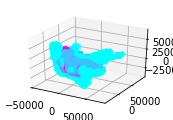

In [20]:
pca = PCA()
#C_tm = np.reshape(C_trial_mat[~np.isnan(C_trial_mat)],[-1,C_trial_mat.shape[-1]])
mask0 = (VRDat['morph']==0) & (VRDat['pos']>0)
mask1 = (VRDat['morph']==1) & (VRDat['pos']>1)
X0 = pca.fit_transform(C[mask0,:])
X0_all = pca.transform(C)
f = plt.figure()
ax = f.add_subplot(221,projection='3d')
s_cxt = ax.scatter(X0_all[:,0],X0_all[:,1],X0_all[:,2],c=VRDat['morph']._values,cmap='cool')






In [17]:
X_mu0 = pca.transform(C_mu_0)
X_mu1 = pca.transform(C_mu_1)
print(X_mu0.shape)

(90, 650)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


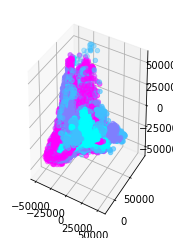

In [19]:

f = plt.figure()
ax = f.add_subplot(221,projection='3d')

s_cxt = ax.scatter(X[:,0],X[:,1],X[:,2],c=VRDat['morph']._values,cmap='cool')

f.show()

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
